# Amazon Reviews on kindle products

### The scope of the project is to explore the reviews submitted by users and understand in depth about the recommendations

The outline for the project will be as follows- 
1. Understand and clean the data
    - Check for null values
    - Drop columns which arent useful
2. Speculate whether ratings are genuine ?
    - what if the one user is trying to give all rating ?
    - How will the distribution look for bulk users ?
    - How many users are bulk ?
3. Find the NPS net promoter score of amazon
    - What's NPS score ?
    - How do we calculated for amazon  ?
4. Pick a product and deep dive
    - We will pick one variation of kindle product drill & analyse its characteristics
5. [Paper white kindle] - NPS score  ? 
6. [Paper white kindle] - Plot time series for review
    - How to handle date time text ?
    - How to plot time series on a graph ? 
    - How does the graph look like in small intervals of 5 days or 10 days or 30 days ?
    - Did the performance (NPS) go up or down with time ?
7. [Paper white kindle] Predict Recommendations based on reviews content
    - Make a clean function
        - Remove punctuations
        - Remove stopwords
        - Stem vs Lemmatize
    - Create a TFIDF vectorizer
    - Create Features
    - Understand and explore sentiment analysis
        - Use compound feature
        - Apply LDA to identify Topics
    - Use RandomForestClassifier
    - Check the score 
        

# 1. Understand and clean the data

- Check for null values
- Drop columns which arent useful


In [0]:
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Clean container
!rm *.*
!ls

sample_data


In [0]:
!wget https://s3.amazonaws.com/amplify-angular-app/dataset/critical-assessment-amazon-reviews-on-kindle/1429_1.csv
add = "1429_1.csv"

reviews = pd.read_csv(add,low_memory=False)
reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

--2018-12-12 00:40:06--  https://s3.amazonaws.com/amplify-angular-app/dataset/critical-assessment-amazon-reviews-on-kindle/1429_1.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.0.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.0.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48993673 (47M) [text/csv]
Saving to: ‘1429_1.csv’

1429_1.csv          100%[===================>]  46.72M  17.9MB/s    in 2.6s    

2018-12-12 00:40:08 (17.9 MB/s) - ‘1429_1.csv’ saved [48993673/48993673]



In [0]:
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,...,doRecommend,id,numHelpful,rating,sourceURLs,text,title,userCity,userProvince,username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [0]:
reviews.nunique() #get a count of unique values.

id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

There are lot of null values and irrelevant columns 

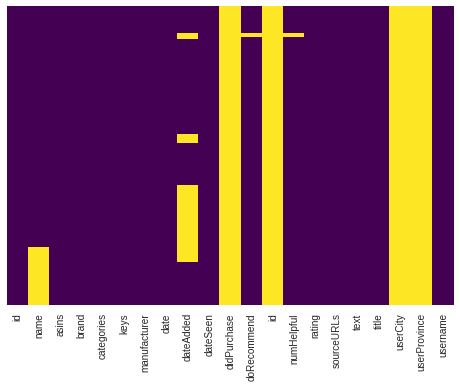

In [0]:
import seaborn as sns
# to check missing values
sns.heatmap(reviews.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
reviews.isnull().sum()
#lets drop usernames, userProvince,id,didPurchase

id                  0
name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
didPurchase     34659
doRecommend       594
id              34659
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
userCity        34660
userProvince    34660
username            2
dtype: int64

Good thing only one one text is blank.

In [0]:
# lets replace nan text with title
reviews.title.fillna('na', inplace=True)
reviews.text.fillna('na', inplace=True)
#reviews[reviews.text.isnull()]['text'] = 'na'
#reviews[reviews.text.isnull()]
#reviews['text'] = reviews.text.fillna(reviews.title, inplace=False)
#reviews[reviews.title.isnull()]

Lets drop columns which are not relevent for analysis.

In [0]:
reviews.drop(labels=['didPurchase','id','userCity','userProvince'],axis=1,inplace=True)

In [0]:
reviews.isnull().sum()

name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
doRecommend       594
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
username            2
dtype: int64

# 2. Speculate whether ratings are genuine ?
- what if the one user is trying to give all rating ?
- How will the distribution look for bulk users ?
- How many users are bulk ?

### Are the all the reviews given by same group of users ? 

In [0]:
rating_perperson=reviews.username.value_counts()
rating_perperson.head()

Mike     138
Chris     93
John      85
Dave      70
Bill      58
Name: username, dtype: int64

Total ratings : 34658
Total users : 26789
Users giving bulk ratings (more than 10) : 146
Bulk ratings : 3160
Populations of bulk ratings : 9.117664031392463
Populations of bulk users : 0.5449998133562283


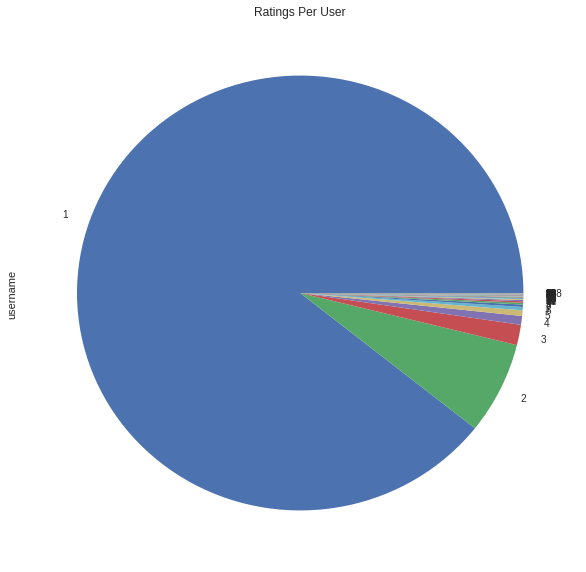

In [0]:
#ratings 
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >10]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

#### Although the pie chart reveals that most of the users have given single rating but its interesting to note following fact
 #### 1 : Only 0.55 % of the users are bulk users
 #### 2 : Around 9 % of the ratings have been submitted by just 0.55% users - Does it seem odd to you ?

count    3158.000000
mean        4.593414
std         0.732940
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
count    31469.000000
mean         4.583686
std          0.735930
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


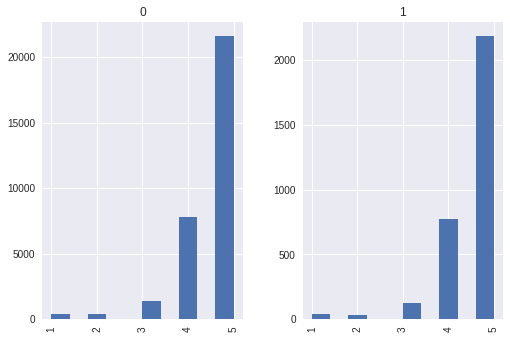

In [0]:
reviews['bulk']= reviews['username'].apply(lambda x : 1 if x in bulk.index else 0)
#gives us the category whether a rating is bulk or not
from matplotlib import pyplot
#series.hist(by=series)
print(reviews.rating.hist(by=reviews.bulk))
print(reviews[reviews.bulk==1].rating.describe())
print(reviews[reviews.bulk==0].rating.describe())

### Well ! that picture says it all. Now we dont think that bulk users are spam since the have the same rating distribution as others

### Distribution of User rating

*** Rating distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


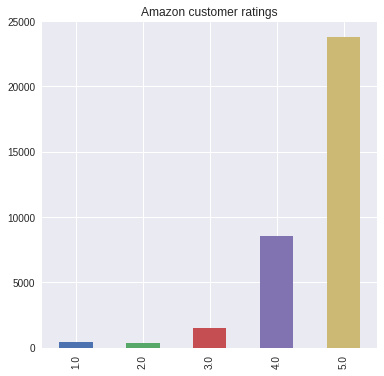

In [0]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

Most ratings are 5 star. As a whole reviews are positive.

# 3. Find the NPS net promoter score of amazon
- What's NPS score ?
- How do we calculated for amazon  ?

#### Looks like amazon is really good 

# NPS Score ( Net promoter score ) 

#### Net Promoters Score helps us evaluate customer satisfaction and loyalty

Rating 1,2,3 - Detractors <br>
Rating 4   - Passive <br>
Rating 5 - Promoters <br>

NPS = (Promoters - Detractors)/Total ratings * 100

In [0]:
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score))


 NPS score of Amazon is : 61.99


# 4. Pick a product and deep dive
- We will pick one variation of kindle product drill & analyse its characteristics

Lets deep dive and pick product to analyse

In [0]:
len(reviews.name.unique())
reviews.name.unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,',
       'Kindle Keyboard,,,\r\nKindle Keyboard,,,',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,',
       'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,',
       'All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi -  Includes Special Offers,,',
       'Amazon Kindle Fire Hd (3rd Generation)

In [0]:
#kindle = reviews[reviews.name=='Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,']
# Amazon Fire Tv
kindle = reviews[reviews.name=='Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,']

In [0]:
kindle.isnull().sum()
# The dataset looks good to go

name            0
asins           0
brand           0
categories      0
keys            0
manufacturer    0
date            0
dateAdded       0
dateSeen        0
doRecommend     0
numHelpful      0
rating          0
sourceURLs      0
text            0
title           0
username        0
bulk            0
dtype: int64

# 5. [Paper white kindle] - NPS score  ? 

In [0]:
kindle_s = kindle.rating.value_counts()
kindle_s

5.0    2545
4.0     534
3.0      61
2.0      22
1.0      14
Name: rating, dtype: int64

 NPS score of Kindle is : 77.08


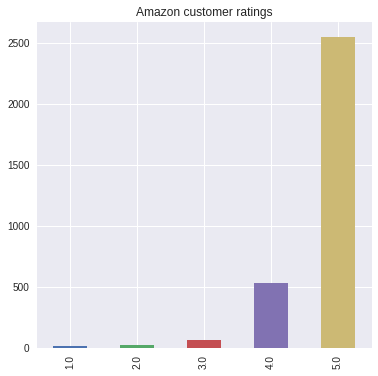

In [0]:
kindle_s.sort_index(inplace=True) # does sorting as per rating

Kindle_NPS_score = round (100*(kindle_s[5]-sum(kindle_s[1:3]))/sum(kindle_s),2)
print (" NPS score of Kindle is : "  + str(Kindle_NPS_score))
#better NPS than overall amazon
kindle_s.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

### What about recommendations ? How is rating related to recommendation ?

In [0]:
kindle.doRecommend.value_counts()

True     3111
False      65
Name: doRecommend, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff380e1b588>,
      dtype=object)

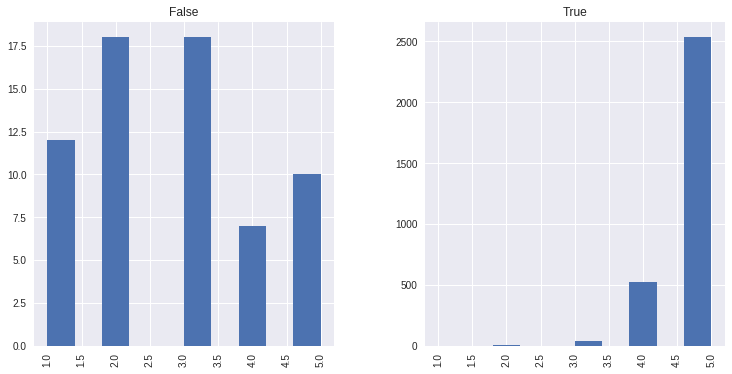

In [0]:
kindle.rating.hist(by=kindle.doRecommend,figsize=(12,6))

In [0]:
plus_kindle = kindle[kindle.doRecommend==True].rating.value_counts()
plus_kindle.sort_index(inplace=True)
recomm_NPS = round(100*(sum(plus_kindle[4:5])-sum(plus_kindle[1:2]))/sum(plus_kindle),2)
minus_kindle = kindle[kindle.doRecommend==False].rating.value_counts()
minus_kindle.sort_index(inplace=True)
notrecomm_NPS = round(100*(sum(minus_kindle[4:5])-sum(minus_kindle[1:2]))/sum(minus_kindle),2)
print("Those who recommend amazon kindle generate high NPS score of " + str(recomm_NPS))
print("Those who DO NOT recommend kindle produce a NPS score of " + str(notrecomm_NPS))
print(" ~ pretty much correct definition of NPS score")


Those who recommend amazon kindle generate high NPS score of 98.23
Those who DO NOT recommend kindle produce a NPS score of -20.0
 ~ pretty much correct definition of NPS score


# 6. [Paper white kindle] - Plot time series for reviews 
- How to handle date time text ?
- How to plot time series on a graph ? 
- How does the graph look like in small intervals of 5 days or 10 days or 30 days ?
- Did the performance (NPS) go up or down with time ?


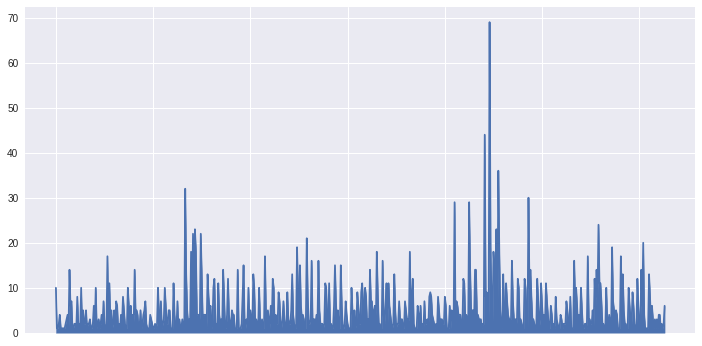

In [0]:
kindle['temp'] = kindle.date.apply(lambda x : pd.to_datetime(x))
kindle_review_dates = kindle.date.value_counts()
kindle_review_dates.sort_index(inplace=True)
kindle_review_dates.plot(kind='area',figsize=(12,6))

In [0]:
rating_perdate = kindle_review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:20]
peakrating

2017-01-23T00:00:00.000Z    69
2017-01-16T00:00:00.000Z    44
2017-02-03T00:00:00.000Z    36
2015-12-28T00:00:00.000Z    32
2017-03-15T00:00:00.000Z    30
2016-12-14T00:00:00.000Z    29
2016-12-30T00:00:00.000Z    29
2017-06-21T00:00:00.000Z    24
2017-01-30T00:00:00.000Z    23
2016-01-08T00:00:00.000Z    23
2016-01-06T00:00:00.000Z    22
2016-01-15T00:00:00.000Z    22
2016-06-10T00:00:00.000Z    21
2017-08-18T00:00:00.000Z    20
2016-05-27T00:00:00.000Z    19
2017-07-07T00:00:00.000Z    19
2017-01-24T00:00:00.000Z    19
2016-10-19T00:00:00.000Z    18
2016-01-09T00:00:00.000Z    18
2016-09-09T00:00:00.000Z    18
Name: date, dtype: int64

In [0]:
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()

1     8
12    3
6     2
10    1
9     1
8     1
7     1
5     1
3     1
2     1
dtype: int64

#### Insight 
1. January month has the highest number of peaks >> Activity is high >> More Sales during Jan ( We all know)
2. There is high degree of variance in reviews added over time



In [0]:
rating_series = pd.DataFrame(kindle.date)
dforms=[]
for x in rating_series.date:
    dforms.append((pd.to_datetime(x)).value)

In [0]:
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms) # added column date_min
rating2.reset_index(inplace=True)
rating2.head()

,index,date,date_min
0,17214,2017-02-05T00:00:00.000Z,1486252800000000000
1,17215,2017-02-05T00:00:00.000Z,1486252800000000000
2,17216,2017-02-05T00:00:00.000Z,1486252800000000000
3,17217,2017-02-05T00:00:00.000Z,1486252800000000000
4,17218,2017-02-05T00:00:00.000Z,1486252800000000000


In [0]:
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
bins

array([1.43588160e+18, 1.43733982e+18, 1.43879804e+18, 1.44025626e+18,
       1.44171448e+18, 1.44317270e+18, 1.44463092e+18, 1.44608914e+18,
       1.44754736e+18, 1.44900558e+18, 1.45046380e+18, 1.45192202e+18,
       1.45338024e+18, 1.45483847e+18, 1.45629669e+18, 1.45775491e+18,
       1.45921313e+18, 1.46067135e+18, 1.46212957e+18, 1.46358779e+18,
       1.46504601e+18, 1.46650423e+18, 1.46796245e+18, 1.46942067e+18,
       1.47087889e+18, 1.47233711e+18, 1.47379533e+18, 1.47525355e+18,
       1.47671177e+18, 1.47816999e+18, 1.47962821e+18, 1.48108643e+18,
       1.48254465e+18, 1.48400287e+18, 1.48546109e+18, 1.48691931e+18,
       1.48837753e+18, 1.48983576e+18, 1.49129398e+18, 1.49275220e+18,
       1.49421042e+18, 1.49566864e+18, 1.49712686e+18, 1.49858508e+18,
       1.50004330e+18, 1.50150152e+18, 1.50295974e+18, 1.50441796e+18,
       1.50587618e+18, 1.50733440e+18])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff380c6c470>]],
      dtype=object)

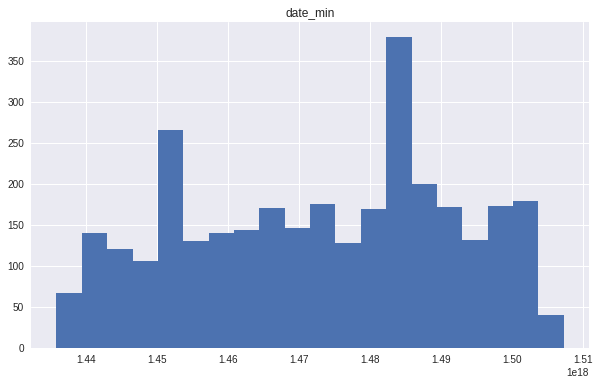

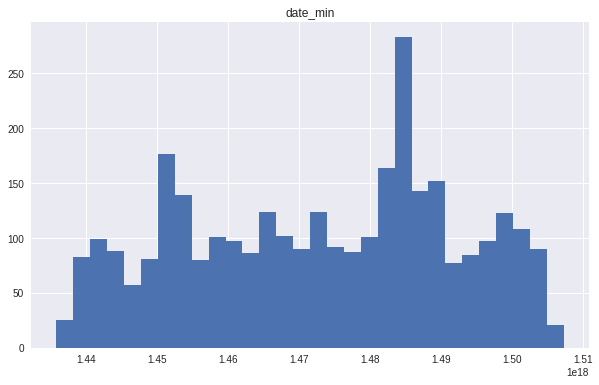

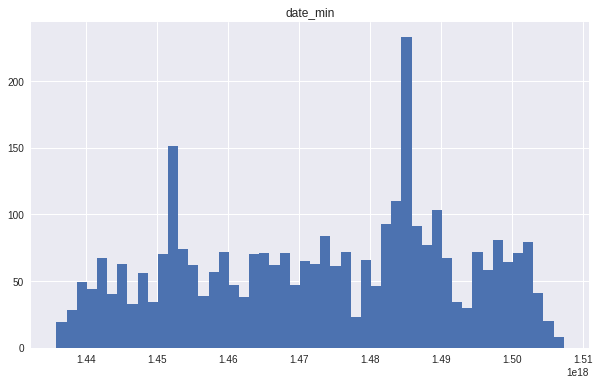

In [0]:
rating2.hist(column='date_min', bins=20,figsize=(10,6),)
rating2.hist(column='date_min', bins=30,figsize=(10,6))
rating2.hist(column='date_min', bins=50,figsize=(10,6))


In [0]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)    

In [0]:
NPS_overtime = kindle[['temp','rating']] # temp is date conversion of 'date' column
NPS_overtime.head()

,temp,rating
17214,2017-02-05,3.0
17215,2017-02-05,5.0
17216,2017-02-05,5.0
17217,2017-02-05,5.0
17218,2017-02-05,3.0


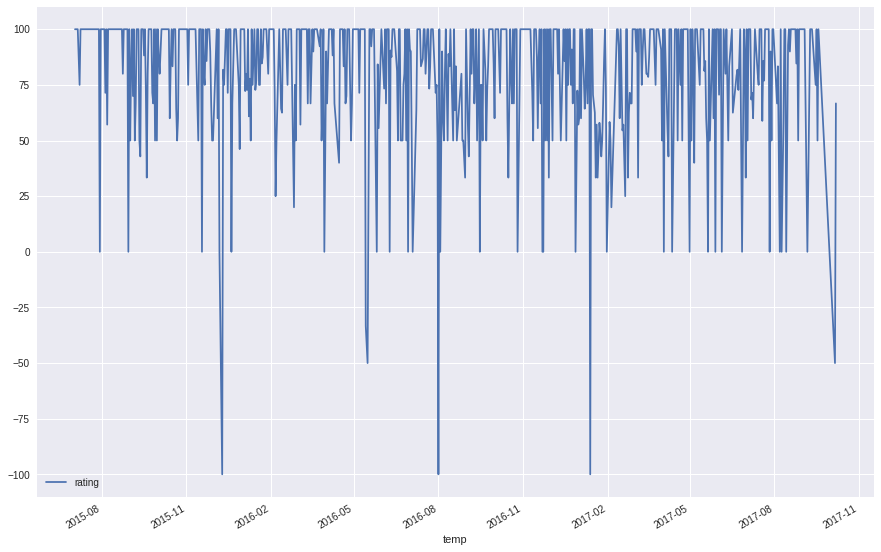

In [0]:
# NPS as per dates
NPS_overtime.groupby(by='temp').agg(NPS_eval).plot(figsize=(15,10))

In [0]:
NPS_overtime['timeline'] = NPS_overtime['temp'].apply(lambda x : (x.month+(12*(x.year-2015)))) # Total number of months after product release
NPS_overtime['timeline'].head()

17214    26
17215    26
17216    26
17217    26
17218    26
Name: timeline, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


,rating
timeline,
34,37.500000
26,62.237762
25,66.000000
28,68.918919
14,69.411765
20,72.277228
12,73.000000
31,74.400000
21,75.324675


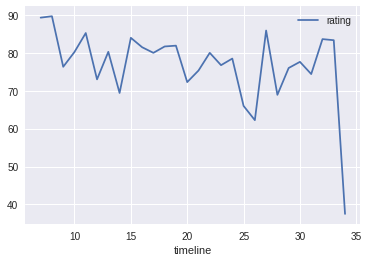

In [0]:
NPS_by_month= NPS_overtime.groupby(by='timeline').agg(NPS_eval)
print(NPS_by_month.plot())
NPS_by_month.sort_values(by='rating')

**Insight:** Over time NPS rating gradually going down.

# 7. [Paper white kindle] Is there any relationship in text length and rating

In [0]:
kindle['textlength'] = kindle['text'].apply(len)
kindle.head(1)

,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,doRecommend,numHelpful,rating,sourceURLs,text,title,username,bulk,temp,textlength
17214,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-02-05T00:00:00.000Z,2017-06-21T07:38:39Z,"2017-06-04T02:18:03.660Z,2017-06-03T18:42:15.341Z",True,0.0,3.0,http://reviews.bestbuy.com/3545/5026300/review...,Its a nice little set up but it's slow. I wish...,I like it but....,ShaesMom,0,2017-02-05,115


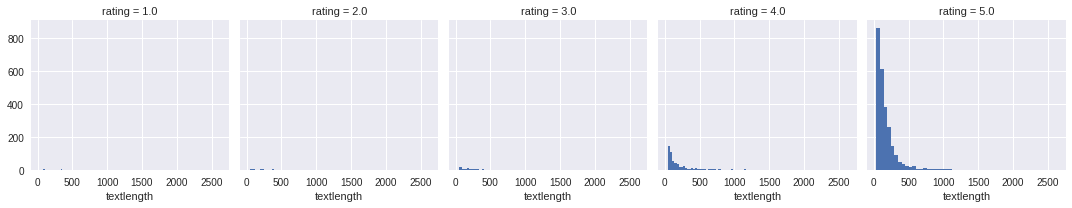

In [0]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(data=kindle, col='rating')
g.map(plt.hist, 'textlength', bins=50)

**Insight:** Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

Let’s create a box plot of the text length for each star rating.

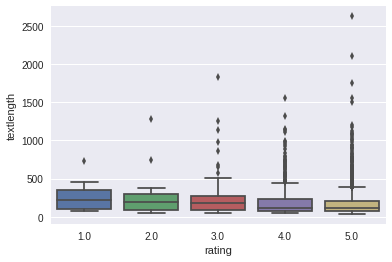

In [0]:
sns.boxplot(x='rating', y='textlength', data=kindle)

**Insight:** From the plot, looks like the 1-star and 2-star ratings have much longer text, but there are many outliers (which can be seen as points above the boxes). Because of this, maybe text length won’t be such a useful feature to consider after all.

# 8. [Paper white kindle] Predict Recommendations based on reviews content
- Make a clean function
  - Remove punctuations
  - Remove stopwords
  - Stem vs Lemmatize
- Create a TFIDF vectorizer
- Create Features
- Understand and explore sentiment analysis
    - Use compound feature
- Use RandomForestClassifier
- Check the score 
        

## Can we predict Recommendations with given comments on product ?

In [0]:
comments = pd.concat([kindle['text']+". "+ kindle['title'],kindle['rating'],kindle['doRecommend']],axis=1)
comments.columns=['text','rating','recommend']

In [0]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import PorterStemmer
import re 

stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()


def clean_stem (sent): 
    #print(sent)
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3

text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Stemmed hello-happiest-place-organ-organ-organ-happi-world-happi-much-happi-
Lemmatized hello-happiest-place-organize-organizes-organizing-happy-world-happiness-much-happy-


### Lets create vectors from the text columns

In [0]:
#comments['text'].fillna('-')
# lets replace nan text with title
comments.text.fillna('no comment', inplace=True)
#reviews[reviews.text.isnull()]['text'] = 'na'
#reviews[reviews.text.isnull()]
#reviews['text'] = reviews.text.fillna(reviews.title, inplace=False)
comments[comments.text.isnull()]

,text,rating,recommend


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))


Stemmed - 3693
Lemmatized - 4547


Stemmed has features 18 % lower than that of Lemmatized. 
    - In the above example in happy line, you can see how ineffective lemmatization can be 
    - Thus we will be applying cleanstem algo here
    - Lower features means more information density in the compressed columns

### Lets have a look on our stemmed data

In [0]:
pd.DataFrame(textfeatures.toarray()).head(15)

,0,1,2,3,4,5,6,7,8,9,...,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The column names dont make sense - Need to update them with real words
    - for this we use vectstem.vocabulary_ to modify the columns

In [0]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,nice,littl,set,slow,wish,would,investig,jump,like,long,...,git,vovag,sinpl,purpl,write,optioni,blackveri,onesveri,reliab,glich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)

,sum_scores_TFIDF
nice,4.242392
littl,0.338632
set,0.515145
slow,4.349600
wish,4.576738
would,3.383977
investig,0.990953
jump,0.179253
like,0.145790
long,0.381124


In [0]:
# Need to see most important words in the reviews
# words used by many people or less frequent in sentences
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:5] 

,sum_scores_TFIDF
gripe,0.076083
grandkid,0.076083
old,0.076083
cow,0.076083
felt,0.076083


In [0]:
#high usage of words in reviews
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
fool,217.397630
summer,209.501804
matt,198.910788
lighter,181.218969
purs,147.851506


### Lets build features on our data


In [0]:
pd.set_option('display.max_colwidth', 0) #will help to show all the text strings in the column. -1
comments.head()

,text,rating,recommend
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True


**What is sentiment analysis ? No idea ? 
**Read the next code block

In [0]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

happy = "I am Happy. this is so awesome. I love life. I will be in heaven"
#when you find free food in university
print("happy " + str(sid.polarity_scores(text)))


sad = "i hate this. I am mad this is stupid. I will kill you"
#when your professor gives you a ZERO in assignment
print("sad " + str(sid.polarity_scores(sad)))

neut = "I will come. You should go. This is blue color"
#when you state facts and nothing else
print("dont care - " + str(sid.polarity_scores(neut)))

srishti = "money"
print("dss - " + str(sid.polarity_scores(srishti)))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
happy {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.9522}
sad {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.9432}
dont care - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dss - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


#### Understand the output
    - sid.polarity is a dictionary
    - pos and neg indicates - positive and negative emotions in sentence
    - we should be interested in compund score which calculates the final effect
   

In [0]:
# Feature 1 : Sentiment compound value
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
comments['sentiment']= comments['text'].apply(lambda x : sentiment(x))

In [0]:
# Feature 2 : Length of string

comments['length'] = comments['text'].apply(lambda x : len(re.split('\W+',x))) # no of works
comments[comments['rating']==5].head(10)

# before we proceed - we need to convert all true >> 1 and false as 0
def convert(x):
    
    if x==True:
        return 1
    else :
        return 0
    
print(convert("False"))

comments['target_rec'] = comments['recommend'].apply(lambda x : convert(x))
comments.head(5)

0


,text,rating,recommend,sentiment,length,target_rec
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True,0.8271,29,1
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True,0.8684,23,1
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True,0.9022,15,1
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True,0.8555,14,1
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True,0.9457,58,1


In [0]:
comments[comments['rating']==1].head(5)

,text,rating,recommend,sentiment,length,target_rec
17220,This product wouldn't turn on nor charge and then store couldn't locate another one for me.. Product Issues,1.0,False,0.0000,20,0
17423,"Would not take a charge, good thing i tried before wrapping it for Christmas.. Had to return this on Christmas eve day",1.0,False,-0.3412,22,0
17443,"I didon't care for this tablet, downloading apps outside of Amazon was really confusing.. Don't like...too hard to download other apps",1.0,False,-0.1611,24,0
17729,"I am really disappointed in this Kindle....I have had many kindles, but I wanted somwthing I thoughtnwould be simple. This kindle doesn't show all my books that are in my cloud..it doesn't matter that they aren't in my device but they should still show up in my cloud...I have to go to my amazon account and transfer the book I want to my device.. Great for someone who doesn't have alot of books",1.0,False,0.7809,80,0
17887,Paper white does not allow you do use books from the library as you cannot load apps. Only books from Amazon are available to read.. Unable to access library,1.0,False,0.0088,29,0


### Lets predict recommendation !

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

# need to reset index of the comments column to match with textfeatures
new_sentiment = comments.sentiment.reset_index()['sentiment']
new_length = comments.length.reset_index()['length']

x_features = pd.concat([new_sentiment,new_length,
                        pd.DataFrame(textfeatures.toarray(),
                        columns=vectstem.vocabulary_)],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features,comments.target_rec,test_size=0.2)

rf = RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=90)
rfmodel=rf.fit(x_train,y_train)

y_pred = rfmodel.predict(x_test)
sorted(zip(rfmodel.feature_importances_,x_train.columns),reverse=True)[0:10]


[(0.029711183289948418, 'sentiment'),
 (0.014657245992727472, 'length'),
 (0.013954065101086701, 'cool'),
 (0.013103984250335923, 'surgeri'),
 (0.011864372524649674, 'huge'),
 (0.00961165376857119, 'wellpric'),
 (0.008607298441017158, 'illiter'),
 (0.008026474531001606, 'evenli'),
 (0.008007842146305144, 'shot'),
 (0.007805818251501986, 'justifi')]

In [0]:
precision, recall, fscore , support = score(y_test,y_pred,average='binary')
print('Precision: {} / Recall :{} / Accuracy {} '.format(round(precision,3),
                                                         round(recall,3),
                                                         round((y_pred==y_test).sum()/len(y_test),3)))

Precision: 0.975 / Recall :1.0 / Accuracy 0.975 


Model is predicted at 98% accuracy.

#### Comment ranking for recommendation

In [0]:
# Ranking
def getRank(num):
  num = num * 100
  if(num > 90):
    return 5
  elif(num > 80):
    return 4
  elif(num > 70):
    return 3
  elif(num > 55):
    return 2
  else:
    return 1

#y_pred
a = rfmodel.predict_proba(x_test)#.apply(lambda x : getRank(x)) np.asmatrix(a)
list(map(lambda x : getRank(x), a[:,1]) )[:10] # for testing just selecting 10


[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

#### Model compare

LR: 0.998394 (0.001967)
KNN: 0.999593 (0.001220)
CART: 0.988341 (0.007764)
NB: 0.943469 (0.015034)
RF: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)


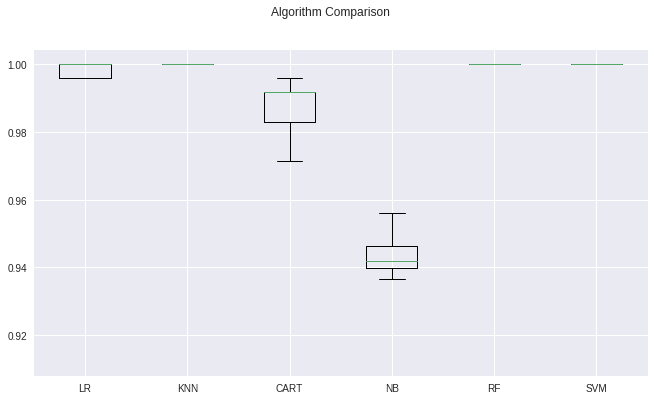

In [0]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score 
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=20)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN and SVM are perfect model.

### Doc2vec predict recommendation !

In [0]:
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [0]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

In [0]:
nltk.download('stopwords')
from nltk.corpus import stopwords  # stop words are, is, the etc. which are not needed for model
# Corpus cleaning
STOPWORDS = set(stopwords.words('english'))
def clean_str(string):
    """
    Tokenization/string cleaning for datasets.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"^b", "", string)
    string = re.sub(r"\\n ", "", string)
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = ' '.join(Word(word).lemmatize() for word in string.split() if word not in STOPWORDS) # delete stopwors from text

    return string.strip().lower()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# Cleaning text
!pip install textblob
import nltk
nltk.download('wordnet')
from textblob import Word
comments['comment_text_clean'] = comments.text.apply(lambda x : clean_str(x))  # calling clean for all rows

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(comments.comment_text_clean, comments.target_rec, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_text = X_train + X_test

In [0]:
all_text[:4]

[TaggedDocument(words=['the', 'paper', 'white', 'version', 'kindle', 'much', 'easier', 'read', 'older', 'one', 'very', 'happy', 'quality', 'ease', 'use', 'kindle', 'paperwhite'], tags=['Train_0']),
 TaggedDocument(words=['i', 'took', 'vacation', 'bahamas', 'bald', 'head', 'read', 'sun', 'pool', 'simply', 'amazing'], tags=['Train_1']),
 TaggedDocument(words=['i', 'got', 'kindle', 'paperwhite', 'read', 'beach', 'the', 'screen', 'easily', 'read', 'sun', 'the', 'compact', 'size', 'nice', 'travel', 'perfect', 'beach'], tags=['Train_2']),
 TaggedDocument(words=['it', 'people', 'want', 'read', 'without', 'glare', 'kindle'], tags=['Train_3'])]

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_text)])

100%|██████████| 3176/3176 [00:00<00:00, 855287.93it/s]


In [0]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_text)]), total_examples=len(all_text), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 3176/3176 [00:00<00:00, 1834358.24it/s]


In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [0]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

#### Model Training with Doc2Vec

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

In [0]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9370409233997902
              precision    recall  f1-score   support

           0       0.04      0.15      0.06        13
           1       0.99      0.95      0.97       940

   micro avg       0.94      0.94      0.94       953
   macro avg       0.51      0.55      0.51       953
weighted avg       0.97      0.94      0.96       953



**Insight:** With Doc2Vec accuracy went down(94%). Which make sense because sentiments usually defined at word level.

In [0]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[  2  11]
 [ 49 891]]


In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

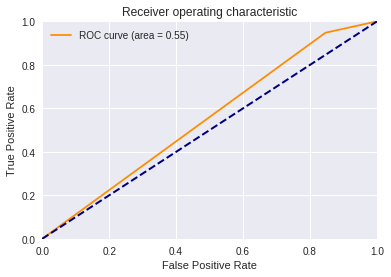

In [0]:
# Get ROC curve for Logistic Regression
get_roc(y_test,y_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

## How does Word Vectors look? What do they say?

In [0]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [0]:
nltk.download('stopwords') # need to reload if using
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')

def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data.iteritems():
        #print(sentence[1])
        strtxt = clean_stem(sentence[1])
        #word_list = strtxt.split(" ")
        corpus.append(strtxt)
            
    return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
corpus = build_corpus(comments.text)   

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

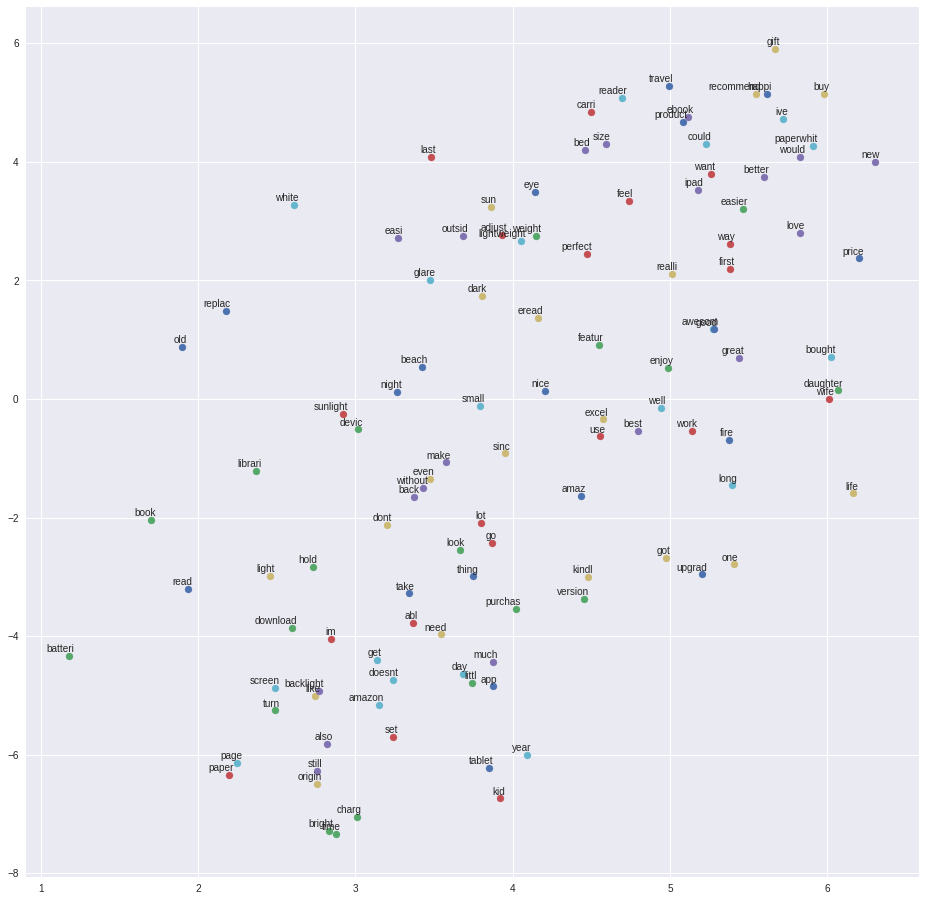

In [0]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [0]:
model.most_similar('good')

[('littl', 0.9997017979621887),
 ('price', 0.999693751335144),
 ('work', 0.9996479749679565),
 ('well', 0.999646782875061),
 ('excel', 0.9996331930160522),
 ('use', 0.9996246099472046),
 ('lot', 0.9996093511581421),
 ('time', 0.999609112739563),
 ('recommend', 0.999599814414978),
 ('buy', 0.9995986819267273)]

**Insight:** Most of the words are showing positive sentiments which justifies significant number of 5-star ratings.

## What are the most used words for recommendation?
Let's draw Word Cloud.

In [0]:
!pip install wordcloud
from PIL import Image
from io import BytesIO
import requests
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

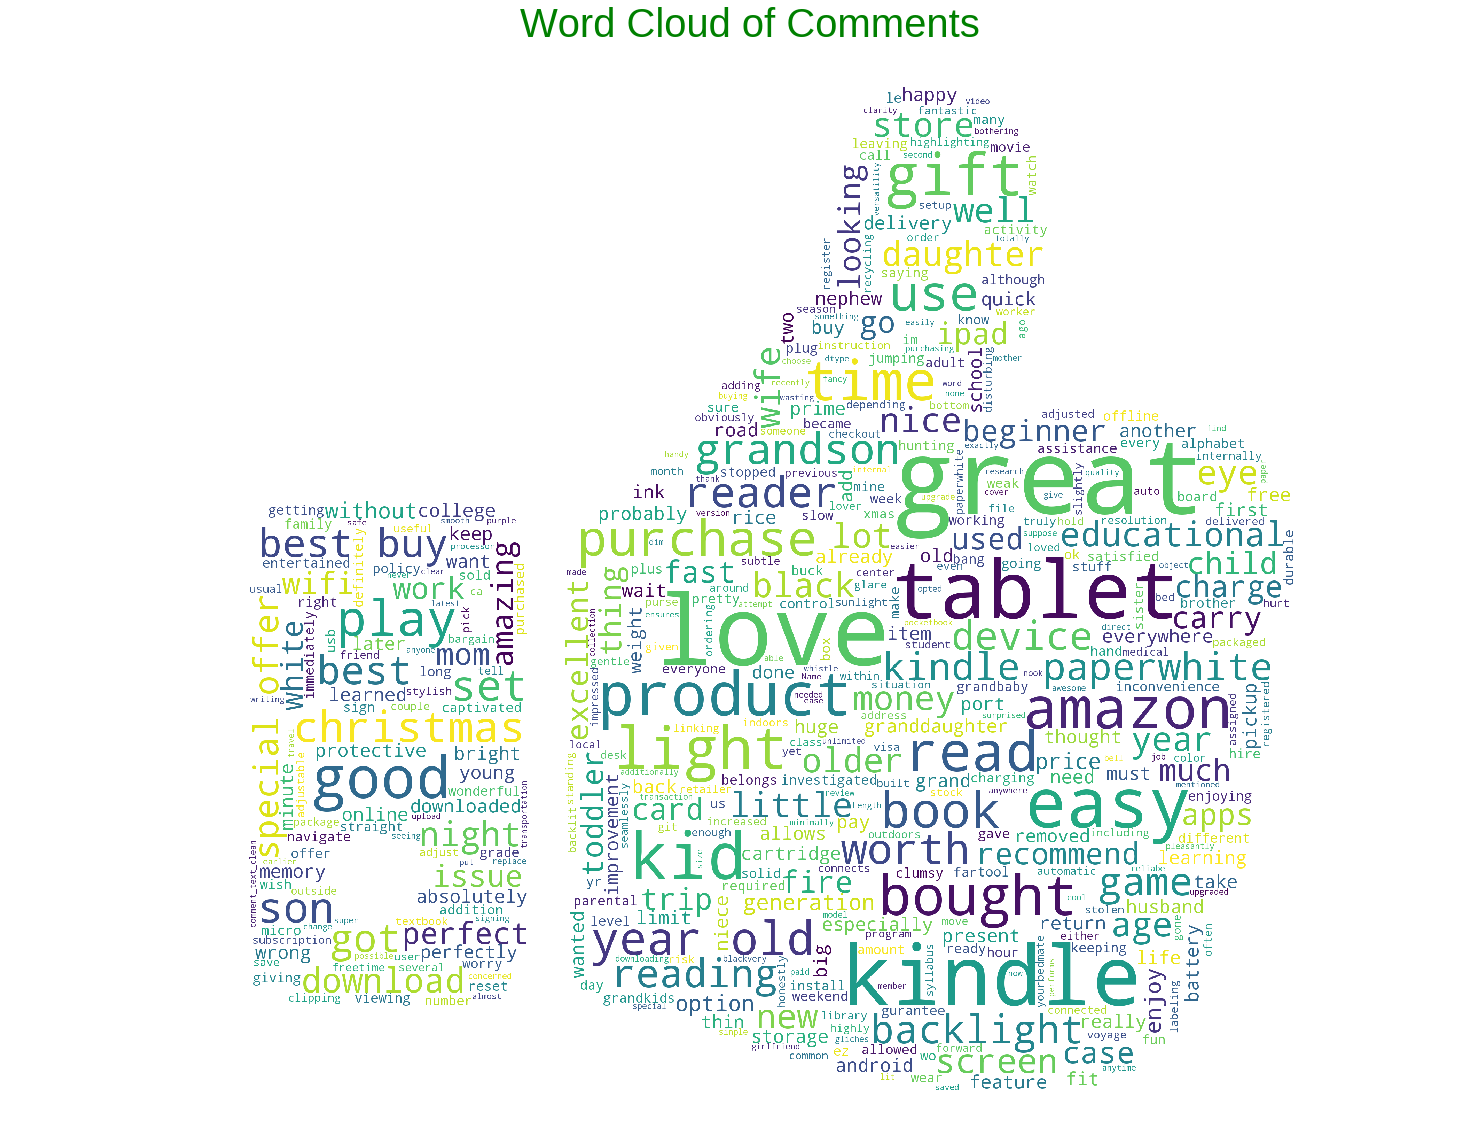

In [0]:
#Word cloud for recommendation
response = requests.get('https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(comments[comments["target_rec"]==1]["comment_text_clean"], upvote_mask, max_words=1000, max_font_size=300, title="Word Cloud of Comments")

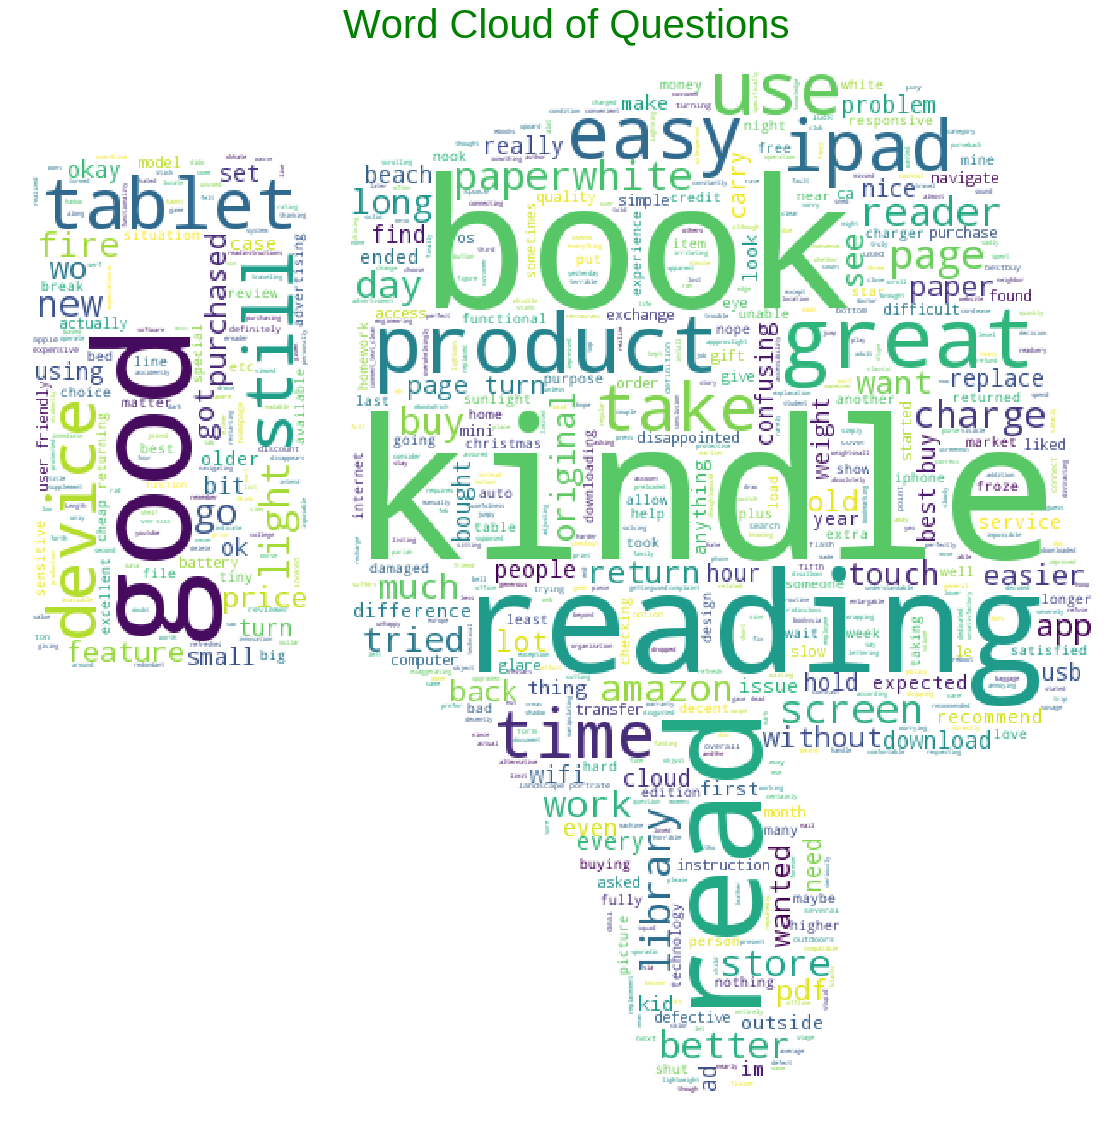

In [0]:
#Word cloud for Fake words
response = requests.get('https://image.freepik.com/free-icon/thumbs-down-silhouette_318-41911.jpg')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(comments[comments["target_rec"]==0]["comment_text_clean"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

**Insight:** Non recommended reviews have average or negative words like Kindle, damage, return, reading, book etc. Surprisingly good, paperwhite are also there but we need to keep in mind we are doing word cloud which is not considering negative context like not good or not better than, not paperwhite like book etc.

## What are most reviewed features are? (Using Topic Modeling for comments with LDA)

In [0]:
#Cleaning and tokenizing
# perform lemmatize and stem preprocessing steps on the data set
!pip install gensim
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()#Stemmers remove morphological affixes from words, leaving only the word

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [0]:
# Preprocess the headline text, saving the results as ‘processed_docs’
processed_docs = comments.text.map(preprocess)  # if want to see only toxic topics df[df['istoxic']>0].comment_text
processed_docs[:10]

17214    [nice, littl, slow, wish, investig, littl, jump, like]                                                                                                                  
17215    [long, app, download, leav, wifi, work, great, road, trip, hunt, trip, great, road, trip]                                                                               
17216    [gift, year, daughter, great, kid, great, kid]                                                                                                                          
17217    [grandkid, love, buy, kid, love]                                                                                                                                        
17218    [great, case, tablet, android, play, store, weak, micro, port, straight, tablet, instal, android, play, store, charg, port, go, best, best, return, polici, tablet, kid]
17219    [grandson, board, offer, plug, wear, fast, good, young, kid]                                         

### Bag of Words on the Data set

In [0]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
import gensim
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 investig
1 jump
2 like
3 littl
4 nice
5 slow
6 wish
7 app
8 download
9 great
10 hunt


#### Filter out tokens that appear in
* less than 15 documents (absolute number) or
* more than 0.5 documents (fraction of total corpus size, not absolute number).
* after the above two steps, keep only the first 100000 most frequent tokens.

In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [0]:
print(dictionary[0] +' - '+ dictionary[0][0])
print(dictionary[1] +' - '+ dictionary[1][0])

like - l
littl - l


### Gensim doc2bow
For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]

In [0]:
# Preview Bag Of Words for our sample preprocessed document.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]], 
bow_doc_0[i][1]))

Word 0 ("like") appears 1 time.
Word 1 ("littl") appears 2 time.
Word 2 ("nice") appears 1 time.
Word 3 ("slow") appears 1 time.
Word 4 ("wish") appears 1 time.


### TF-IDF
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.19399020072944298),
 (1, 0.6647845647225382),
 (2, 0.28605759255420915),
 (3, 0.5198776636659932),
 (4, 0.4102774099202811)]


### LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

For each topic, we will explore the words occuring in that topic and its relative weight.

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    topic.title

Topic: 0 
Words: 0.078*"kindl" + 0.043*"like" + 0.033*"light" + 0.029*"love" + 0.028*"great" + 0.025*"book" + 0.019*"need" + 0.017*"good" + 0.017*"screen" + 0.014*"paperwhit"
Topic: 1 
Words: 0.082*"kindl" + 0.063*"great" + 0.040*"reader" + 0.033*"easi" + 0.025*"best" + 0.024*"product" + 0.021*"book" + 0.016*"good" + 0.015*"price" + 0.014*"paperwhit"
Topic: 2 
Words: 0.101*"book" + 0.062*"easi" + 0.026*"love" + 0.021*"great" + 0.020*"reader" + 0.017*"kindl" + 0.016*"light" + 0.015*"devic" + 0.015*"good" + 0.015*"amazon"
Topic: 3 
Words: 0.056*"easi" + 0.050*"light" + 0.043*"kindl" + 0.038*"great" + 0.034*"reader" + 0.032*"good" + 0.019*"paperwhit" + 0.018*"weight" + 0.018*"love" + 0.015*"enjoy"
Topic: 4 
Words: 0.104*"great" + 0.044*"product" + 0.040*"kindl" + 0.039*"book" + 0.037*"easi" + 0.028*"light" + 0.027*"love" + 0.019*"batteri" + 0.019*"buy" + 0.014*"life"
Topic: 5 
Words: 0.089*"love" + 0.088*"kindl" + 0.036*"paperwhit" + 0.031*"great" + 0.030*"book" + 0.030*"reader" + 0.023*"

**Insight:** Top reviewed/talked about topics are about book, light, screen, kindle, price. 

### LDA using TF-IDF

In [0]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.026*"easi" + 0.023*"reader" + 0.020*"love" + 0.019*"gift" + 0.018*"great" + 0.016*"kindl" + 0.015*"good" + 0.015*"book" + 0.013*"buy" + 0.013*"excel"
Topic: 1 Word: 0.021*"kindl" + 0.020*"great" + 0.018*"easi" + 0.018*"work" + 0.017*"love" + 0.017*"book" + 0.014*"product" + 0.014*"reader" + 0.013*"enjoy" + 0.013*"light"
Topic: 2 Word: 0.024*"wife" + 0.022*"love" + 0.019*"kindl" + 0.017*"product" + 0.017*"white" + 0.016*"reader" + 0.016*"paper" + 0.015*"easier" + 0.015*"book" + 0.014*"great"
Topic: 3 Word: 0.019*"love" + 0.018*"great" + 0.017*"kid" + 0.017*"kindl" + 0.016*"product" + 0.014*"price" + 0.014*"easi" + 0.013*"good" + 0.013*"like" + 0.013*"light"
Topic: 4 Word: 0.017*"great" + 0.017*"easi" + 0.017*"like" + 0.016*"kindl" + 0.016*"reader" + 0.016*"light" + 0.015*"love" + 0.014*"travel" + 0.014*"devic" + 0.014*"paperwhit"
Topic: 5 Word: 0.019*"good" + 0.019*"reader" + 0.019*"kindl" + 0.018*"product" + 0.018*"great" + 0.017*"eread" + 0.017*"best" + 0.016*"love" +

**Insight:** Top reviewed/talked about topics are related to backlight, light, paper white, kindle etc. Slightly different then Bag of word LDA. 

### LDA with Count Vectorizer

In [0]:
message_docs = comments.text.tolist() #df[df['istoxic']>0].comment_text_clean.tolist() #Can also try Toxic only

In [0]:
!pip install lda
import lda
from sklearn.feature_extraction.text import CountVectorizer

n_topics = 20 # number of topics
n_iter = 500 # number of iterations

# vectorizer: ignore English stopwords & words that occur less than 5 times
cvectorizer = CountVectorizer(min_df=5, stop_words='english')
cvz = cvectorizer.fit_transform(message_docs)
# train an LDA model
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)

In [0]:
X_topics = lda_model.fit_transform(cvz)

INFO:lda:n_documents: 3176
INFO:lda:vocab_size: 1152
INFO:lda:n_words: 49527
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -532063
INFO:lda:<10> log likelihood: -359643
INFO:lda:<20> log likelihood: -343889
INFO:lda:<30> log likelihood: -336322
INFO:lda:<40> log likelihood: -332693
INFO:lda:<50> log likelihood: -330200
INFO:lda:<60> log likelihood: -328488
INFO:lda:<70> log likelihood: -326970
INFO:lda:<80> log likelihood: -326522
INFO:lda:<90> log likelihood: -325608
INFO:lda:<100> log likelihood: -324690
INFO:lda:<110> log likelihood: -323749
INFO:lda:<120> log likelihood: -323413
INFO:lda:<130> log likelihood: -322312
INFO:lda:<140> log likelihood: -322042
INFO:lda:<150> log likelihood: -321426
INFO:lda:<160> log likelihood: -321686
INFO:lda:<170> log likelihood: -320970
INFO:lda:<180> log likelihood: -321112
INFO:lda:<190> log likelihood: -321474
INFO:lda:<200> log likelihood: -320887
INFO:lda:<210> log likelihood: -320855
INFO:lda:<220> log likelihood: -3

In [0]:
#add a threshold factor that would help filter out unconfident topic assignments. Other wise visualization will be busy
threshold = 0.5
_idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
X_topics = X_topics[_idx]

In [0]:
X_topics.shape

(834, 20)

### Reducing to 2-D with t-SNE

In [0]:
from sklearn.manifold import TSNE

# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 834 samples in 0.001s...
[t-SNE] Computed neighbors for 834 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 834 / 834
[t-SNE] Mean sigma: 0.166859
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.345070
[t-SNE] KL divergence after 1000 iterations: 0.231359


In [0]:
X_topics.shape

(834, 20)

### Visualizing groups and their keywords

In [0]:
#First we do some setup work (import classes & functions, set params, etc.)
!pip install bokeh
import numpy as np
from bokeh.plotting import save
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import  output_notebook
from bokeh.models import HoverTool

n_top_words = 5 # number of keywords we show

# 20 colors
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

In [0]:
#Then we find the most likely topic for each news
_lda_keys = []
for i in range(X_topics.shape[0]):
  _lda_keys +=  X_topics[i].argmax(),

In [0]:
# get top words for each topic
topic_summaries = []
topic_word = lda_model.topic_word_  # all topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
  topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] # get!
  topic_summaries.append(' '.join(topic_words)) # append!

In [0]:
# plot the news (each point representing one news)
#output_notebook()
title = 'Commant LDA viz'
num_example = len(X_topics)

plot_lda = figure(plot_width=1400, plot_height=1100,
                    title=title,
                    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                    x_axis_type=None, y_axis_type=None, min_border=1)
source = ColumnDataSource(
        data=dict(
            x= tsne_lda[:, 0], #tsne_lda.iloc[:, 0],
            y= tsne_lda[:, 1], #tsne_lda.iloc[:, 1],
            content= message_docs[:num_example],
            topic_key= _lda_keys[:num_example],
            c=colormap[_lda_keys][:num_example]
        )
    )

plot_lda.circle('x', 'y', source=source, color='c')
#show(plot_lda)

GlyphRenderer(id='1031', ...)

In [0]:
#plot the crucial words for each topic and tooltip
# randomly choose a news (within a topic) coordinate as the crucial words coordinate
output_notebook() # must be called in same cell
topic_coord = np.empty((X_topics.shape[1], 2)) * np.nan
for topic_num in _lda_keys:
  if not np.isnan(topic_coord).any():
    break
  topic_coord[topic_num] = tsne_lda[_lda_keys.index(topic_num)]

# plot crucial words
for i in range(X_topics.shape[1]):
  plot_lda.text(topic_coord[i, 0], topic_coord[i, 1], [topic_summaries[i]])

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - topic: @topic_key"}

show(plot_lda)
# save the plot
#save(plot_lda, '{}.html'.format(title))



Loading BokehJS ...

**Insight:** Top reviewed Kindle topics are Paper like look and size, Battery life, price, good for kids etc.

## Thank You !